In [1]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
sns.set()

/home/hchaves/GitHub/coc472-cad/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results = pd.DataFrame(columns=["n_rows", 
"time_c_normal", "time_c_reversed",  
"time_fortran_normal", "time_fortran_reversed"])
results

,n_rows,time_c_normal,time_c_reversed,time_fortran_normal,time_fortran_reversed


In [3]:
# Considerando 16GB disponível
# n = 46339
# 8*(n**2 + 2*n) <= 16*2**30  == True

# N_MAX_ROWS = 46339


In [4]:
N_MAX_ROWS = 16384

results["n_rows"] = np.linspace(2, N_MAX_ROWS, 20).astype(int)
results["n_rows"]

0        1
1        2
2        8
3       25
4       74
5      219
6      645
7     1896
8     5573
9    16384
Name: n_rows, dtype: int64

#### Analysis - Program in C Language (Normal Loop)

In [5]:
for n_rows in tqdm(results["n_rows"].tolist()):
  start = time()
  !./main_c $n_rows 0
  end = time()
  offset = end - start

  results.loc[results["n_rows"] == n_rows, "time_c_normal"] = offset

  0%|          | 0/10 [00:00<?, ?it/s]

Normal Loop


 10%|█         | 1/10 [00:00<00:01,  5.90it/s]

Normal Loop


 20%|██        | 2/10 [00:00<00:01,  5.93it/s]

Normal Loop


 30%|███       | 3/10 [00:00<00:01,  5.94it/s]

Normal Loop


 40%|████      | 4/10 [00:00<00:01,  5.91it/s]

Normal Loop


 50%|█████     | 5/10 [00:00<00:00,  5.82it/s]

Normal Loop


 60%|██████    | 6/10 [00:01<00:00,  5.17it/s]

Normal Loop


 70%|███████   | 7/10 [00:01<00:01,  2.74it/s]

Normal Loop


 80%|████████  | 8/10 [00:06<00:03,  1.81s/it]

Normal Loop


 90%|█████████ | 9/10 [00:48<00:14, 14.17s/it]

Normal Loop


100%|██████████| 10/10 [06:44<00:00, 40.42s/it] 


#### Analysis - Program in C Language (Reversed Loop)

In [6]:
for n_rows in tqdm(results["n_rows"].tolist()):
  start = time()
  !./main_c $n_rows 1
  end = time()
  offset = end - start

  results.loc[results["n_rows"] == n_rows, "time_c_reversed"] = offset

  0%|          | 0/10 [00:00<?, ?it/s]

Reversed Loop


 10%|█         | 1/10 [00:00<00:01,  5.53it/s]

Reversed Loop


 20%|██        | 2/10 [00:00<00:01,  5.64it/s]

Reversed Loop


 30%|███       | 3/10 [00:00<00:01,  5.71it/s]

Reversed Loop


 40%|████      | 4/10 [00:00<00:01,  5.73it/s]

Reversed Loop


 50%|█████     | 5/10 [00:00<00:00,  5.68it/s]

Reversed Loop


 60%|██████    | 6/10 [00:01<00:00,  5.09it/s]

Reversed Loop


 70%|███████   | 7/10 [00:01<00:01,  2.69it/s]

Reversed Loop


 80%|████████  | 8/10 [00:06<00:03,  1.83s/it]

Reversed Loop


 90%|█████████ | 9/10 [00:48<00:14, 14.26s/it]

Reversed Loop


100%|██████████| 10/10 [06:53<00:00, 41.32s/it] 


#### Analysis - Program in Fortran Language (Normal Loop)

In [8]:
for n_rows in tqdm(results["n_rows"].tolist()):
  start = time()
  !./main_f $n_rows 0
  end = time()
  offset = end - start

  results.loc[results["n_rows"] == n_rows, "time_fortran_normal"] = offset

  0%|          | 0/10 [00:00<?, ?it/s]

 Normal Loop


 10%|█         | 1/10 [00:00<00:01,  5.57it/s]

 Normal Loop


 20%|██        | 2/10 [00:00<00:01,  5.70it/s]

 Normal Loop


 30%|███       | 3/10 [00:00<00:01,  5.73it/s]

 Normal Loop


 40%|████      | 4/10 [00:00<00:01,  5.78it/s]

 Normal Loop


 50%|█████     | 5/10 [00:00<00:00,  5.76it/s]

 Normal Loop


 60%|██████    | 6/10 [00:01<00:00,  5.76it/s]

 Normal Loop


 70%|███████   | 7/10 [00:01<00:00,  5.73it/s]

 Normal Loop


 80%|████████  | 8/10 [00:01<00:00,  5.08it/s]

 Normal Loop


 90%|█████████ | 9/10 [00:02<00:00,  2.97it/s]

 Normal Loop


100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


#### Analysis - Program in Fortran Language (Reversed Loop)

In [9]:
for n_rows in tqdm(results["n_rows"].tolist()):
  start = time()
  !./main_f $n_rows 1
  end = time()
  offset = end - start

  results.loc[results["n_rows"] == n_rows, "time_fortran_reversed"] = offset

  0%|          | 0/10 [00:00<?, ?it/s]

 Reversed Loop


 10%|█         | 1/10 [00:00<00:01,  5.54it/s]

 Reversed Loop


 20%|██        | 2/10 [00:00<00:01,  5.65it/s]

 Reversed Loop


 30%|███       | 3/10 [00:00<00:01,  5.71it/s]

 Reversed Loop


 40%|████      | 4/10 [00:00<00:01,  5.77it/s]

 Reversed Loop


 50%|█████     | 5/10 [00:00<00:00,  5.80it/s]

 Reversed Loop


 60%|██████    | 6/10 [00:01<00:00,  5.80it/s]

 Reversed Loop


 70%|███████   | 7/10 [00:01<00:00,  5.75it/s]

 Reversed Loop


 80%|████████  | 8/10 [00:01<00:00,  5.29it/s]

 Reversed Loop


 90%|█████████ | 9/10 [00:02<00:00,  3.17it/s]

 Reversed Loop


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


In [10]:
results

,n_rows,time_c_normal,time_c_reversed,time_fortran_normal,time_fortran_reversed
0,1,0.168729,0.179893,0.178661,0.179791
1,2,0.165799,0.172451,0.171038,0.172533
2,8,0.166244,0.170641,0.172033,0.171619
3,25,0.168549,0.172013,0.168703,0.168867
4,74,0.174697,0.177277,0.172805,0.169489
5,219,0.233742,0.234965,0.17174,0.170362
6,645,0.71658,0.731649,0.175352,0.175665
7,1896,4.905497,4.961468,0.242718,0.220085
8,5573,41.333692,41.573923,0.641258,0.593163
9,16384,356.16251,364.830719,14.791916,8.832119


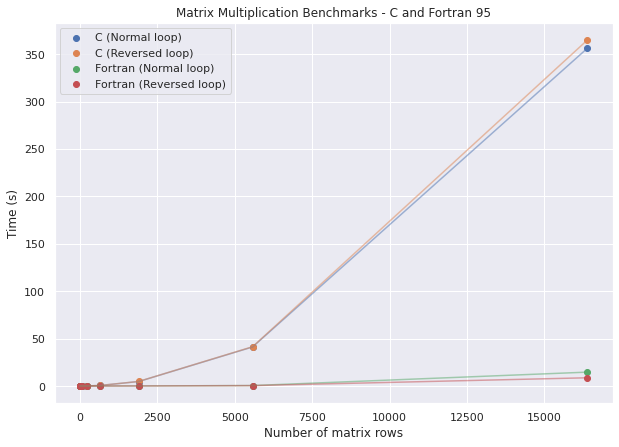

In [31]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(results["n_rows"], results["time_c_normal"],  label="C (Normal loop)")
ax.plot(results["n_rows"], results["time_c_normal"], alpha=0.5)
ax.scatter(results["n_rows"], results["time_c_reversed"], label="C (Reversed loop)")
ax.plot(results["n_rows"], results["time_c_reversed"], alpha=0.5)

ax.scatter(results["n_rows"], results["time_fortran_normal"], label="Fortran (Normal loop)")
ax.plot(results["n_rows"], results["time_fortran_normal"], alpha=0.5)
ax.scatter(results["n_rows"], results["time_fortran_reversed"], label="Fortran (Reversed loop)")
ax.plot(results["n_rows"], results["time_fortran_reversed"], alpha=0.5)

ax.set_title("Matrix Multiplication Benchmarks - C and Fortran 95")
ax.set_ylabel("Time (s)")
ax.set_xlabel("Number of matrix rows")

plt.legend()
plt.show()